Date
2020-11-09     71892.0
2020-11-10    105862.0
2020-11-11    106541.0
2020-11-12     98491.0
2020-11-13    139193.0
dtype: float64


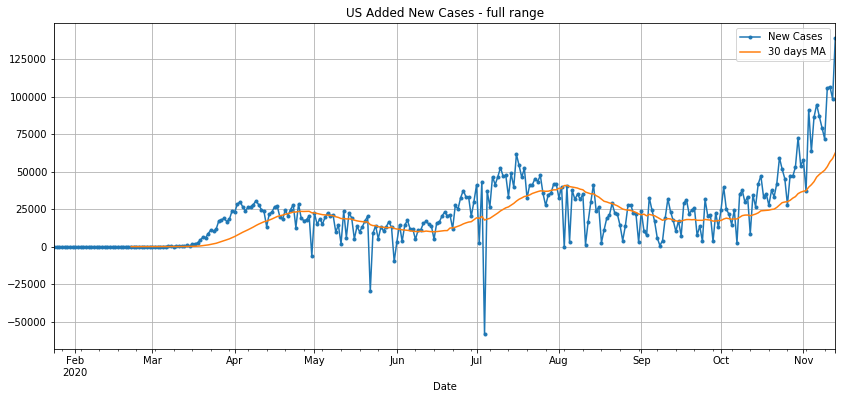

Deaths Per Day
Date
2020-11-09     698.0
2020-11-10    1400.0
2020-11-11    1388.0
2020-11-12     924.0
2020-11-13    1431.0
Name: Dead, dtype: float64
Deaths Per Day
            Daily Deaths Addition
Date                             
2020-11-09                  698.0
2020-11-10                 1400.0
2020-11-11                 1388.0
2020-11-12                  924.0
2020-11-13                 1431.0


<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

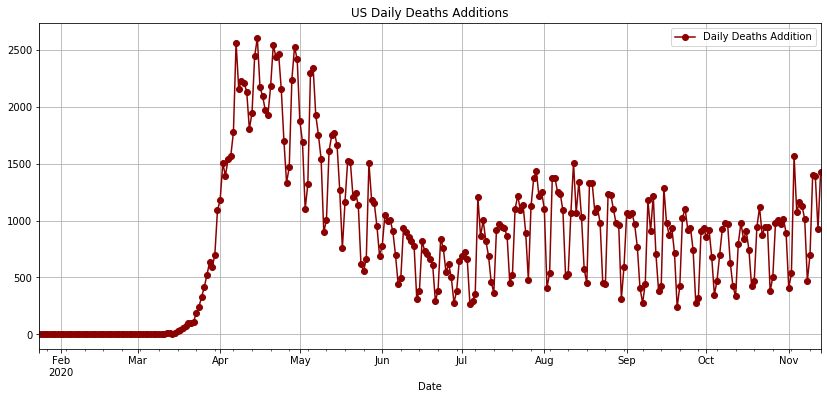

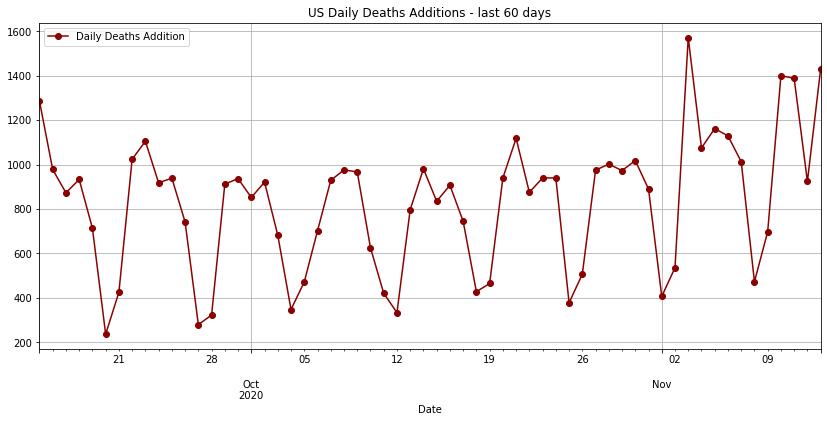

New Cases Per Day
            Daily Cases Addition
Date                            
2020-11-09              119944.0
2020-11-10              140290.0
2020-11-11              143231.0
2020-11-12              153496.0
2020-11-13              184514.0


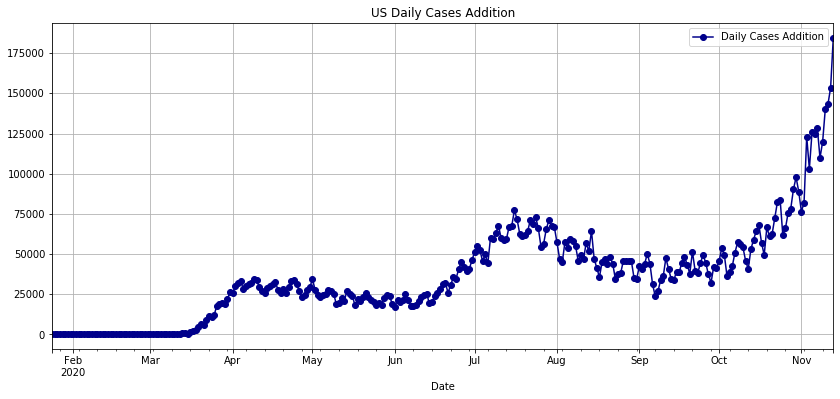

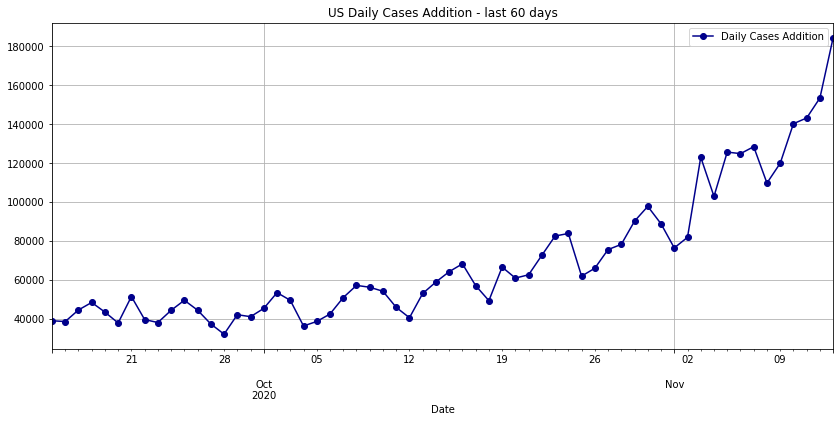

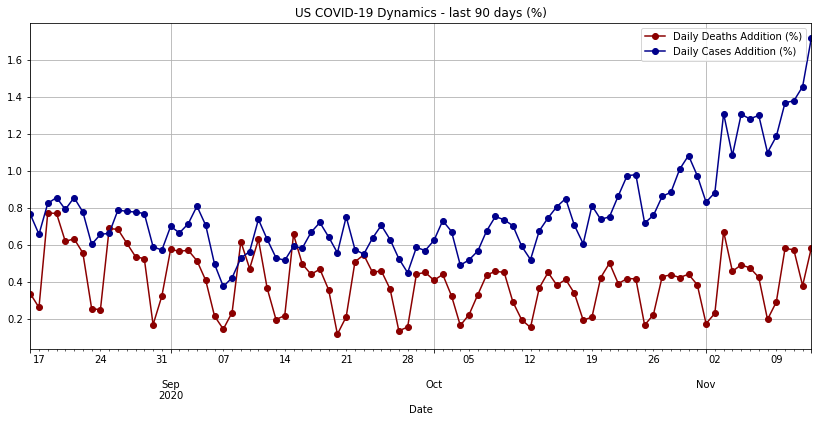

In [1]:
import covid_19_shared
covid_19_shared.Country_COVID19_Stats("US").show()